In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

from rayopt import system_from_text, Analysis, GeometricTrace

np.set_printoptions(precision=3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
columns = "type roc distance radius material"
text = """
    S       0      0    10 AIR
    S  25.907     10  10.6 SK4
    S 147.341  5.083  8.98 AIR
    S  34.804  2.355  6.05  F4
    S  17.340  1.694  5.25 AIR
    A       0  2.542  5.15 AIR
    S  -17.34  2.542   5.2  F4
    S -34.804  1.694    6. AIR
    S -138.87  2.355   8.6 SK4
    S -24.396  5.083 10.24 AIR
    S       0 89.832    63 AIR
    """

s = system_from_text(text, columns.split(),
    description="four element double gauss, intermediate optical design")
s.object.angle = .36

if False:
    print(s)
    s.reverse()
    s.object.angular_radius = .16
    s.object.finite = False
    s[1].distance = 10
    print(s)

if False:
    s[2].angles = np.array([.1, .0, 0])
    s[2].update()

/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:254: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:259: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.l/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:196: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2


System: four element double gauss, intermediate optical design
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Object:
 Index: 1
 Entrance: 21.2 dia at 10
 Pupil: 12.4 dia at 31.4
 Semi-Angle: 20.6
Image:
 Index: 1
 Entrance: 20.5 dia at 88.8
 Pupil: 23.8 dia at 189
 Radius: 38.2
 NA: 0.0628
Stop: 5
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf         20         basic/air   1.000     nan     nan
 1 S         10      25.91       21.2               SK4   1.613     nan     nan
 2 S      5.083      147.3      17.96         basic/air   1.000     nan     nan
 3 S      2.355       34.8       12.1                F4   1.617     nan     nan
 4 S      1.694      17.34       10.5         basic/air   1.000     nan     nan
 5 S      2.542        inf       10.3         basic/air   1.000     nan     nan
 6 S      2.542     -17.34       10.4                F4   1.617     nan     nan
 7 S      1.694      -34.8         12         basic/a

/home/rj/work/nist/pyrayopt/rayopt/analysis.py:408: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:424: RuntimeWarning: invalid value encountered in true_divide
  z = -t.y[-1, :, 1]/tanarcsin(t.i[-1])[:, 1]


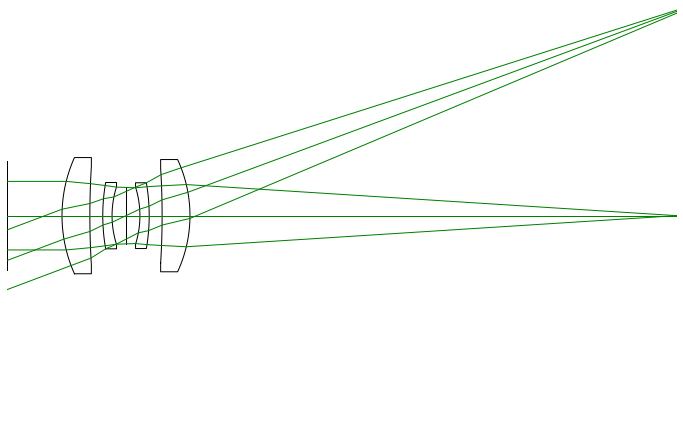

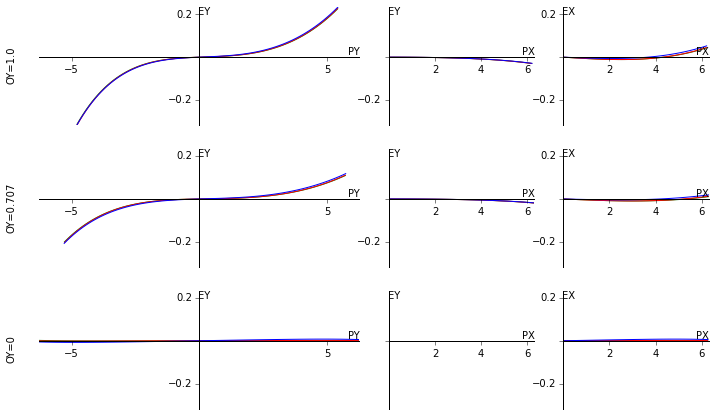

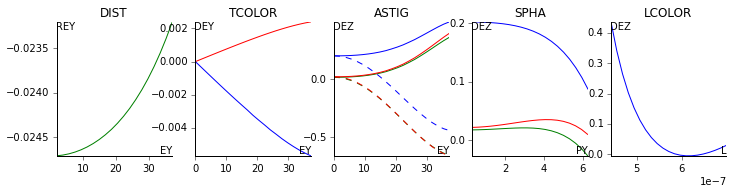

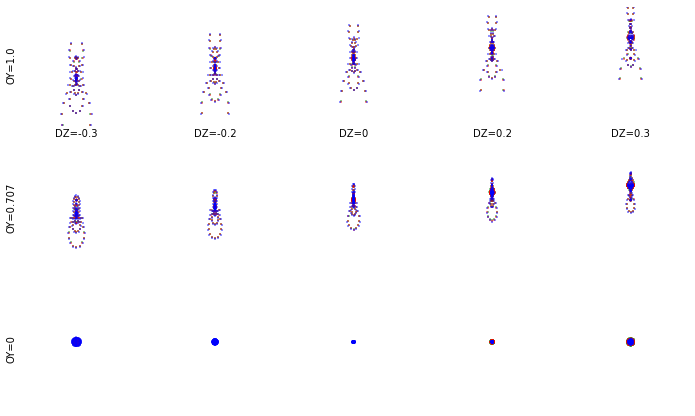

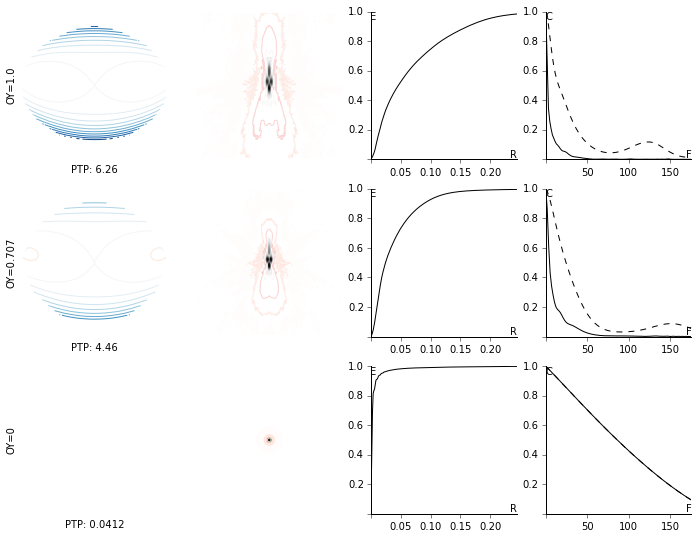

In [3]:
a = Analysis(s)